In [1]:
import pandas as pd

c:\Users\gioel\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\gioel\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\gioel\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import os

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix

In [6]:
gt_map = dict()

In [7]:
for subdir, dirs, files in os.walk("SCORE_EXA/GT"):
    for file in files:
        if "npy" not in file:
            fpath = os.path.join(subdir, file)
            
            df = pd.read_csv(fpath, header = None)
            values = [x[0] for x in df.values]
            
            fname = file.split(".csv")[0]
            
            gt_map[fname] = values.copy()
            

In [8]:
scores_map = dict()
rocauc_map = dict()

In [9]:
def compute_threshold(in_data, th_type, th_factor):
    if th_type == "MV":
        return np.max(in_data)
    elif th_type == "MAD":
        mad =  np.median(in_data) + 1.4826*th_factor*np.median(np.abs(in_data - np.median(in_data)))
        print(mad)
        return mad
    elif th_type == "SD":
        return np.mean(in_data) + th_factor*np.std(in_data)
    elif th_type == "IQR":
        return np.percentile(in_data, 75) + th_factor*(np.percentile(in_data, 75) - np.percentile(in_data, 25))

In [10]:
def compute_rocauc(pred, gt):
    if len(pred) > len(gt):
        pred = pred[-len(gt):]
    elif len(pred) < len(gt):
        gt = gt[-len(pred):]
        
    return roc_auc_score(gt, pred)

In [11]:
val_scores = dict()

In [12]:
anomaly_scores_by_method = dict()

In [13]:

for subdir, dirs, files in os.walk("VALIDATION_EXA"):
    for file in files:
        if "ipynb" not in file:
            arch = file.split(".")[0]

            if arch not in val_scores:
                val_scores[arch] = dict()

            fpath = os.path.join(subdir, file)

            if "npy" in file:
                values = [x for x in np.load(fpath)]
                fname = file.split(".npy")[0]
                val_scores[arch][fname] = values

            if "csv" in file:
                df = pd.read_csv(fpath, header = None)
                values = [x[0] for x in df.values]
                val_scores[arch][fname] = values
            


In [14]:
import copy

In [18]:
for subdir, dirs, files in os.walk("SCORE_EXA"):

    for file in files:
        arch = subdir.split("\\")[1]
        if arch not in scores_map:
            scores_map[arch] = dict()
            
        if arch not in rocauc_map:
            rocauc_map[arch] = dict()
            
                
        if "npy" not in file:
            fpath = os.path.join(subdir, file)
            df = pd.read_csv(fpath, header = None)
            
            values = [x[0] for x in df.values]
                        
            fname = file.split(".csv")[0]

            gt = gt_map[fname]
            
            

            values = [0]*(len(gt)-len(values)) + values
            
            scores_map[arch][fname] = copy.deepcopy(values)
            
            rocauc_map[arch][fname] = copy.deepcopy(compute_rocauc(copy.deepcopy(values), gt))



In [20]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

def plot_roc_curve(true_y, y_prob,label):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr,label=label)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

CONV_AE 0.8953889336511989
DENSE_AE 0.7556463524965836
ELM 0.9155716554455661
GT 1.0
GT_Exathlon 1.0
LSTM 0.879217406955225
LSTM_AE 0.8499636570067326
REENC 0.8880405571581584
USAD 0.8707903470459769
VAE 0.8538496115095087
59244 59244


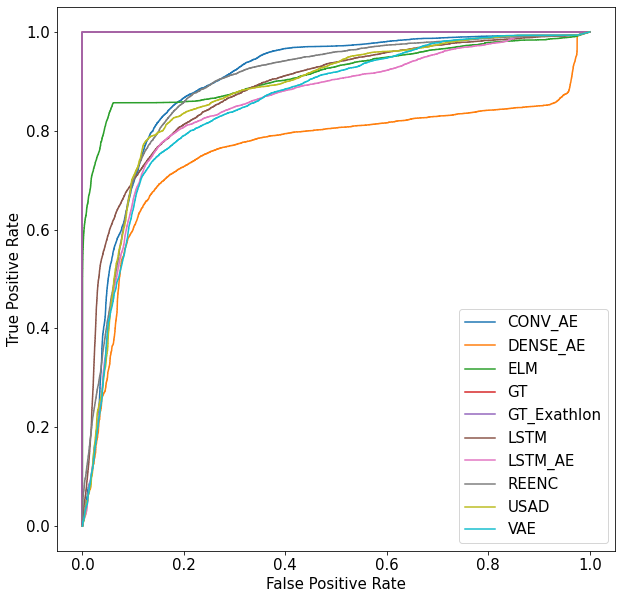

In [21]:
import collections
from sklearn import datasets, metrics, model_selection, svm

cumscores_map = dict()
cumrocauc_map = dict()
cumgt_map = dict()

sorted_scores = dict()
sorted_gt = dict()

plt.figure(figsize=(10,10))
for m in scores_map:

    cumscores_map[m] = sum(collections.OrderedDict(scores_map[m]).values(), [])
    cumgt_map = sum(collections.OrderedDict(gt_map).values(), [])
    rocauc = compute_rocauc(cumscores_map[m], cumgt_map)

    print(m, rocauc)

    
    #plt.title(m)
    plt.grid()
    plt.rcParams.update({'font.size': 15})

    plot_roc_curve(cumgt_map, cumscores_map[m],m)

plt.legend()
#plt.savefig(f'./AUROC/completo_AUROC.pdf')
print(len(cumscores_map[m]), len(cumgt_map))

In [23]:
norm=[]
out=[]
for x in range(len(gt_map[str(1)])):
    if(gt_map[str(1)][x]==1):
        out.append(gt_map[str(1)][x])
    else:
        norm.append(gt_map[str(1)][x])


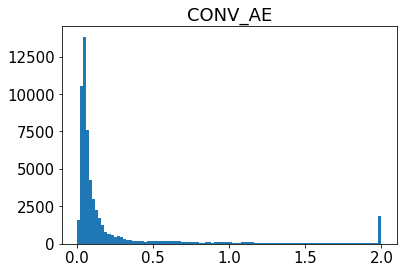

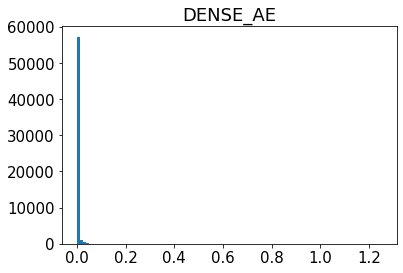

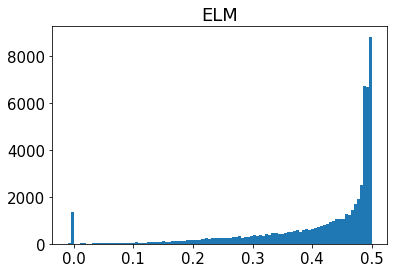

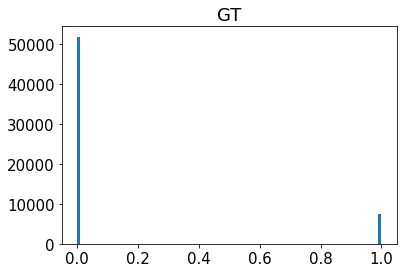

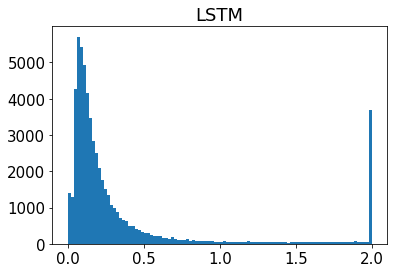

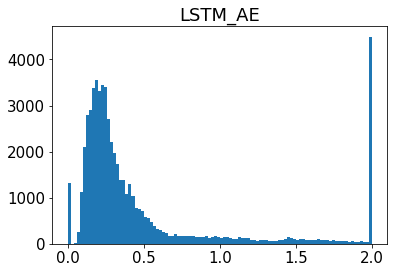

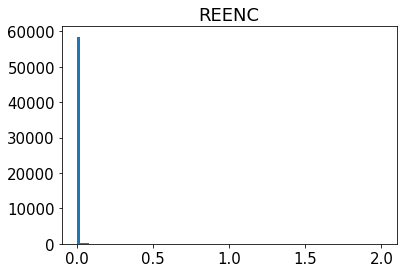

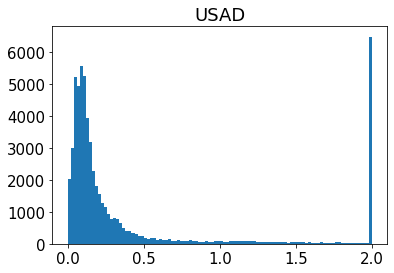

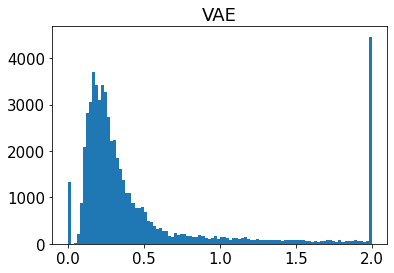

In [43]:
for m in cumscores_map:
    fig, ax = plt.subplots()
    ax = plt.hist(cumscores_map[m], bins=100)
    plt.title(m)
    plt.rcParams.update({'font.size': 15})

    plt.savefig(f'./figure/{m}_DIST.pdf')

In [20]:
rocauc_map_mean = dict()

In [21]:
for rme in rocauc_map:
    rocauc_map_mean[rme] = np.mean(np.array(list(rocauc_map[rme].values())))

In [22]:
rocauc_map_mean

{'CONV-AE': 0.9013910698612407,
 'ELM': 0.9150533758645578,
 'GT': 1.0,
 'LSTM': 0.8782944789140208,
 'LSTM-AE': 0.8777619473282051,
 'REENC': 0.8977318562160439,
 'USAD': 0.8471915499040562,
 'VAE': 0.8980344055069915,
 'DENSE-AE': 0.8015455890475427}

In [23]:
thresholds_dict = {
    'MV': None,
    'MAD': {0.5: None, 1.0: None, 1.5: None, 2.0: None},
    'IQR': {0.5: None, 1.0: None, 1.5: None, 2.0: None},
    'SD': {0.5: None, 1.0: None, 1.5: None, 2.0: None}
}

In [ ]:
meth_thres_dict = {}

In [ ]:
import copy

In [ ]:
for meth in val_scores:
    all_files_scores = sum(val_scores[meth].values(), [])
    print(meth)
    print(len(all_files_scores))
    
    iqr_scores = [compute_threshold(all_files_scores, 'IQR', th_factor) for th_factor in [0.5, 1.0, 1.5, 2.0]]
    thresholds_dict['IQR'][0.5] = copy.deepcopy(iqr_scores[0])
    thresholds_dict['IQR'][1.0] = copy.deepcopy(iqr_scores[1])
    thresholds_dict['IQR'][1.5] = copy.deepcopy(iqr_scores[2])
    thresholds_dict['IQR'][2.0] = copy.deepcopy(iqr_scores[3])
    
    mad_scores = [compute_threshold(all_files_scores, 'MAD', th_factor) for th_factor in [0.5, 1.0, 1.5, 2.0]]
    thresholds_dict['MAD'][0.5] = copy.deepcopy(mad_scores[0])
    thresholds_dict['MAD'][1.0] = copy.deepcopy(mad_scores[1])
    thresholds_dict['MAD'][1.5] = copy.deepcopy(mad_scores[2])
    thresholds_dict['MAD'][2.0] = copy.deepcopy(mad_scores[3])
    
    sd_scores = [compute_threshold(all_files_scores, 'SD', th_factor) for th_factor in [0.5, 1.0, 1.5, 2.0]]
    thresholds_dict['SD'][0.5] = copy.deepcopy(sd_scores[0])
    thresholds_dict['SD'][1.0] = copy.deepcopy(sd_scores[1])
    thresholds_dict['SD'][1.5] = copy.deepcopy(sd_scores[2])
    thresholds_dict['SD'][2.0] = copy.deepcopy(sd_scores[3])
    
    mv_scores = compute_threshold(all_files_scores, 'MV', None)
    thresholds_dict['MV'] = mv_scores

    
    if meth == "DENSE-AE":
        print(thresholds_dict)
        print(sd_scores)
    
    
    copied_dict = copy.deepcopy(dict(thresholds_dict))
    meth_thres_dict[meth] = copied_dict


In [ ]:
meth_thres_dict

In [ ]:
f1_map = dict()

In [ ]:
def compute_tpfpfn(pred_scores, gt, thresh, verbose= False):
    if verbose:
        print(thresh)
        
    preds = (pred_scores>thresh)*1
    if len(preds) < len(gt):
        preds = [0]*(len(gt) - len(preds)) + list(preds)
             
    cm = confusion_matrix(preds, gt)
    
    TP = cm[1][1]
    FP = cm[1][0]
    FN = cm[0][1]
    TN = cm[0][0]
        
    return TP, FP, FN, TN

In [ ]:
compute_tpfpfn(np.array([0.8, 0.7, 0.6, 0.5]), np.array([0, 1, 1, 1]), 0.9)

In [ ]:
for subdir, dirs, files in os.walk("SCORE_EXA"):
    for file in files:
        arch = subdir.split("/")[1]
        
        if arch != "GT":
        
            if arch not in f1_map:
                f1_map[arch] = dict()

            if "npy" not in file:
                fpath = os.path.join(subdir, file)
                df = pd.read_csv(fpath, header = None)

                values = [x[0] for x in df.values]

                fname = file.split(".csv")[0]

                if arch == 'ELM' or arch == 'USAD':
                    fname = int(fname) + 1
                    fname = str(fname)

                gt = gt_map[fname]


                for thr_method in meth_thres_dict[arch]:
                    if thr_method not in f1_map[arch]:
                        f1_map[arch][thr_method] = dict()

                    for th_factor in [0.5, 1.0, 1.5, 2.0]:
                        if th_factor not in f1_map[arch][thr_method]:                    
                            f1_map[arch][thr_method][th_factor] = dict()

                        if thr_method == 'MV':
                            thresh = meth_thres_dict[arch][thr_method]
                        else:
                            thresh = meth_thres_dict[arch][thr_method][th_factor]

                        if fname not in f1_map[arch][thr_method][th_factor]:
                            f1_map[arch][thr_method][th_factor][fname] = dict()

                        verbose = False
                        if arch == "DENSE-AE" and thr_method == "SD" and fname == "1":
                            verbose = True

                        f1_map[arch][thr_method][th_factor][fname]['TP'], f1_map[arch][thr_method][th_factor][fname]['FP'], f1_map[arch][thr_method][th_factor][fname]['FN'], f1_map[arch][thr_method][th_factor][fname]['TN'] = compute_tpfpfn(values, gt, thresh, verbose)

                        if arch == "DENSE-AE" and thr_method == "SD" and fname == "1":
                            print(f1_map[arch][thr_method][th_factor][fname]['TP'], f1_map[arch][thr_method][th_factor][fname]['FP'], f1_map[arch][thr_method][th_factor][fname]['FN'])


In [ ]:
f1_map

In [ ]:
import pandas as pd

def flatten_dict(nested_dict):
    res = {}
    if isinstance(nested_dict, dict):
        for k in nested_dict:
            flattened_dict = flatten_dict(nested_dict[k])
            for key, val in flattened_dict.items():
                key = list(key)
                key.insert(0, k)
                res[tuple(key)] = val
    else:
        res[()] = nested_dict
    return res


def nested_dict_to_df(values_dict):
    flat_dict = flatten_dict(values_dict)
    df = pd.DataFrame.from_dict(flat_dict, orient="index")
    df.index = pd.MultiIndex.from_tuples(df.index)
    df = df.unstack(level=-1)
    df.columns = df.columns.map("{0[1]}".format)
    return df

In [ ]:
results_df = nested_dict_to_df(f1_map)
results_df[250:300]

In [ ]:
results_df = results_df.reset_index().groupby(["level_0", "level_1", "level_2"]).sum()

In [ ]:
results_df["F1"] = results_df["TP"]/(results_df["TP"] + 0.5*(results_df["FP"] + results_df["FN"]))

In [ ]:
results_df[0:50]

In [ ]:
sorted_scores = []
sorted_gt = []

In [ ]:
tp, fp, fn, tn = 0, 0, 0, 0

for i in range(33):
    si = str(i+1)
    sorted_scores.append(scores_map['DENSE-AE'][si])
    sorted_gt.append(gt_map[si])
    
    print(sum(gt_map[si])/len(gt_map[si]))
    
    tpp, fpp, fnp, tnp = compute_tpfpfn(np.array(scores_map['DENSE-AE'][si]), gt_map[si], 0.0015506898737774517)
    tp += tpp
    fp += fpp
    fn += fnp
    tn += tnp
    
    
    print(tp+fn)
    print(tp+fp+fn+tn)
print(tp, tn, fp, fn)


In [ ]:
fn, fp, tp, tn

In [ ]:
tp/(tp+0.5*(fn+fp))